# Predictive Modeling for Bike-Sharing Demand Analysis : Multiple Linear Regression Model

## Problem Statement
### Overview

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system. 

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market.

### Objective

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands.

### Goal

- Developing a linear regression model to find out the variables which are significant for the `demand for shared bikes`.
- The model will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations.
- Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Data Description

### Data Dictionary Summary:

The data contains different attributes. The details of the data dictionary is given below:

- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit : 
     - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	 - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	 - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	 - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


### Model Target Variable:

The model will be build taking the `cnt` as the target variable.

## Model Building

The Linear regression model building consists of the following steps:

- Step 1: Importing necessary libraries
- Step 2: Reading and understanding data
- Step 3: Data Preparation
- Step 4: Visualising the Data
- Step 5: Creating Dummy Variables
- Step 6: Spliting the data into Training and Test set
- Step 7: Rescaling of Data Features
- Step 8: Building the Linear Regression model
- Step 9: Residual Analysis of the Train data
- Step 10: Making Predictions using the Final Model
- Step 11: Model Evaluation
- Step 12: Summary and Conclusion

## Step 1: Importing Necessary Libraries

In [1]:
# For reading and visualising data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# For train-test split operation using sklearn
from sklearn.model_selection import train_test_split

# For performing MinMax scaling using sklearn
from sklearn.preprocessing  import MinMaxScaler

# For building model using statsmodels
import statsmodels.api as sm

# For checking VIF using statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For performing RFE and LinearRegression using sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# For checking R-squared and mean_squared_error using sklear
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Step 2: Reading and Understanding Data

In [2]:
# Reading the CSV file "day.csv" into dataframe "df"
df = pd.read_csv("day.csv")

# First five rows of the data
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Shape of the data
df.shape

(730, 16)

In [4]:
# Info of the data to check for nulls and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking stats of the data
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Observation:
- The data contains 730 rows and 16 columns.
- The data does not contains any null values, so we don't need to worry.

## Step 3: Data Preparation

#### Drop some columns which are not required
- `instant` column can be dropped as it indicates the row numbers only.
- `dteday` column can be dropped since it is repeatating information. Same data available in columns `yr` and `mnth`.
- `casual` and `registered` columns can be dropped since it will create problem during analysis. Our target variable `cnt` is sum of these two variable. `cnt` = `casual` + `registered` . 

In [6]:
# Dropping the not required columns and checking head of data
df.drop(columns = ["instant", "dteday", "casual", "registered"], inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [7]:
# shape of data
df.shape

(730, 12)

In [8]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#### Creating levels for the categorical variable columns 

For better analysis instead of numbers we'll create levels for each columns as follows:

- season : 1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter' 
- mnth : 1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december' 
- weekday : 0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'
- weathersit : 1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'

In [9]:
# creating levels
df['season'] = df['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
df['mnth'] = df['mnth'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5: 'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
df['weekday'] = df['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3: 'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
df['weathersit'] = df['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_rain', 4: 'heavy_rain'})

In [10]:
# check the head
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# shape
df.shape

(730, 12)

In [12]:
# checking the info for null and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 4: Visualising the Data

In [13]:
# Head of the data
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


#### Visualising the numerical variables

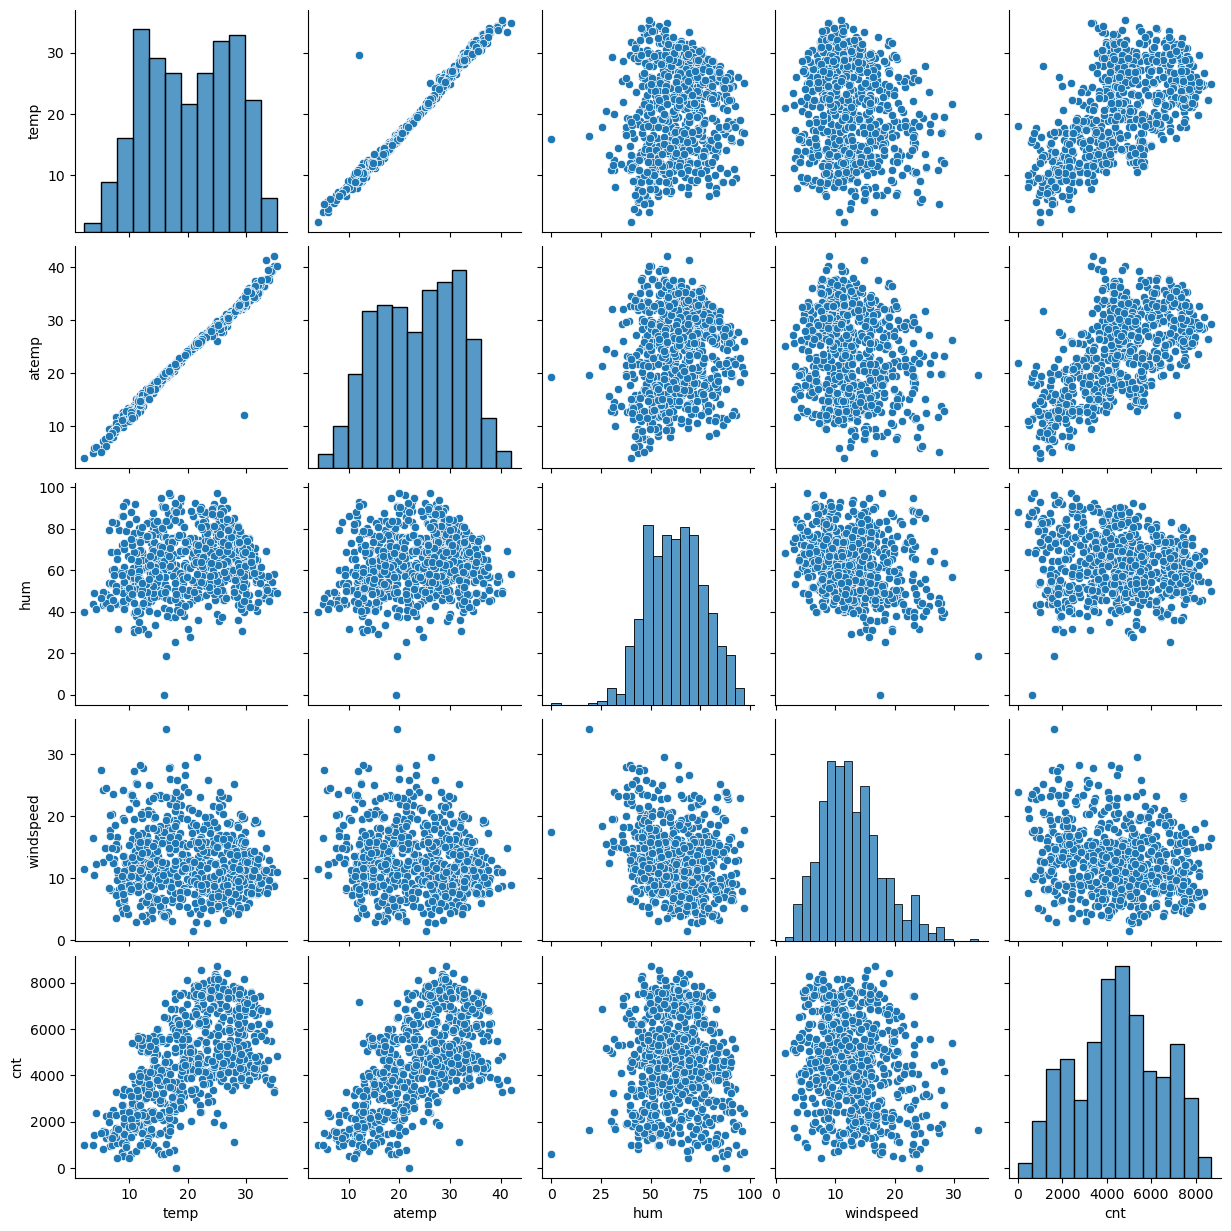

In [14]:
# Pairplot between numerical variables

sns.pairplot(df, vars= ['temp','atemp','hum', 'windspeed','cnt'])
plt.show()

#### Observations
- `temp` and `atemp` are highly correlated with each other.
- `cnt` and `temp` there seems a positive correlation.

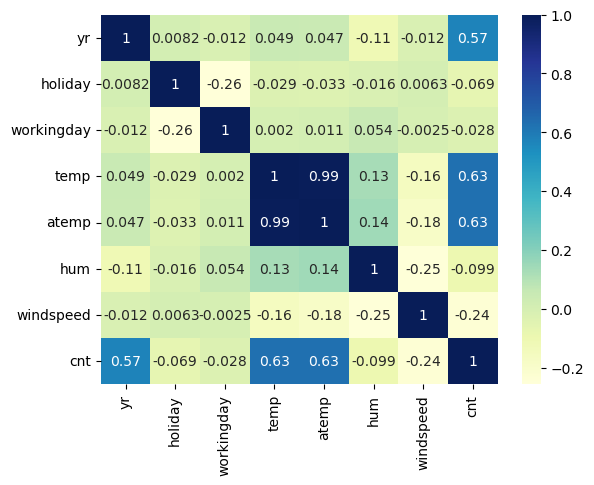

In [15]:
# Correlations among the numerical variables
features = df[['yr', 'holiday', 'workingday', 'temp','atemp','hum', 'windspeed','cnt']]

sns.heatmap(features.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

#### Observation
- `temp` and `atemp` is very highly correlated (0.99). 
- `temp` and `cnt` is positively correlated (0.63).
- `yr` and  `cnt` is positively correlated (0.57).

#### Visualising the categorical variables

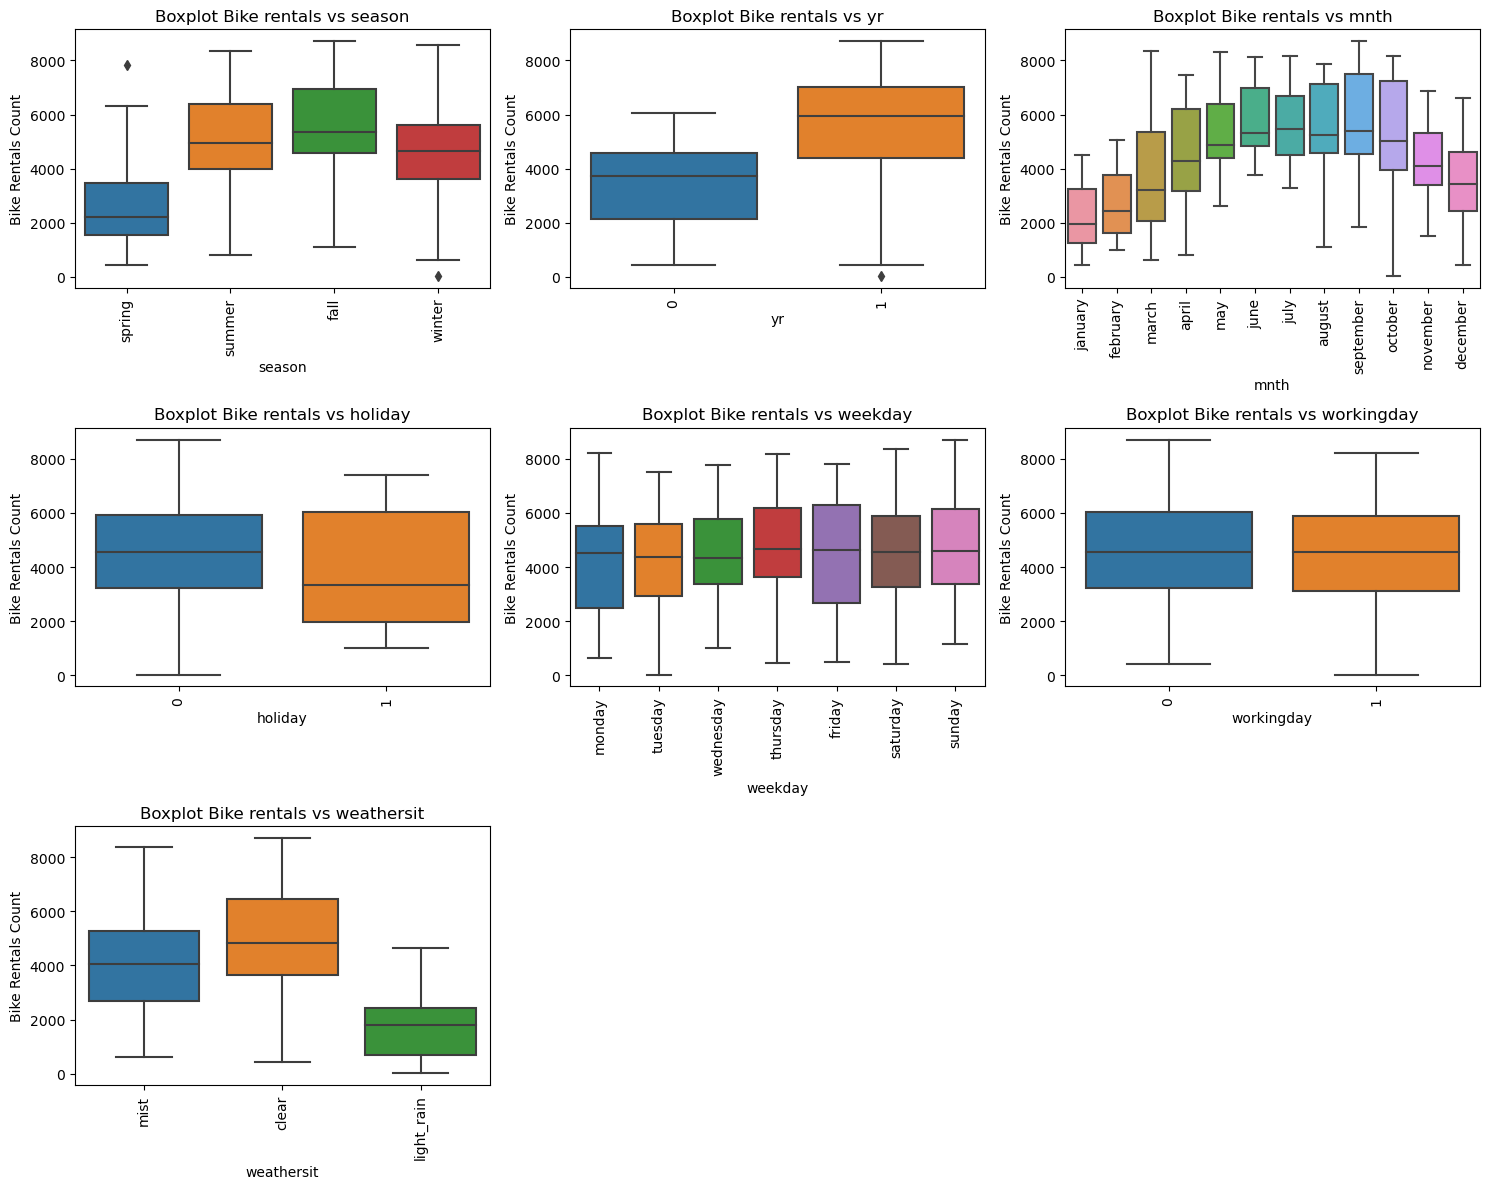

In [16]:
# Boxplot for the categorical variables

features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 12))

for i, feature in enumerate (features , 1):
    plt.subplot(3,3,i)
    sns.boxplot(x = feature, y = 'cnt', data = df)
    plt.title(f'Boxplot Bike rentals vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Bike Rentals Count')
    plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

#### Obsevations
- `fall` is having the highest average rantals and `spring` is being the least
- One outlier observed for `spring` this need to check
- Yearly growth observed from `2018` to `2019` with mean approx. 2000 counts
- From `june` to `october` is the pick time for bike rentals. Having highest avarage rental counts
- `holiday` is having less rental counts than the `working days`
- `weekday` and `workingday` doesn't have any significant variations
- `good weather` obviously signifies more rentals.

#### Analysing the outlier in season 'spring'

spring is having major values in range 2000 to 4000 with median around 2000. A value near 8000 is suspisious

In [17]:
# Inspecting the outlier in spring
df[(df.season == 'spring') & (df.cnt > 7000)]

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
440,spring,1,march,0,sunday,0,mist,21.080847,25.2523,75.5833,7.417168,7836


#### Observation
- This data seems to suspicious since the weathersit is moderate and month is march, so dropping it would be better.

In [18]:
# Dropping the outlier in spring
df.drop(df[(df.season == 'spring') & (df.cnt > 7000)].index , inplace = True)

In [19]:
# Check the shape
df.shape

(729, 12)

In [20]:
# Info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      729 non-null    object 
 1   yr          729 non-null    int64  
 2   mnth        729 non-null    object 
 3   holiday     729 non-null    int64  
 4   weekday     729 non-null    object 
 5   workingday  729 non-null    int64  
 6   weathersit  729 non-null    object 
 7   temp        729 non-null    float64
 8   atemp       729 non-null    float64
 9   hum         729 non-null    float64
 10  windspeed   729 non-null    float64
 11  cnt         729 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.0+ KB


Now we have 729 rows and 12 columns for further analysis 

## Step 5: Creating Dummy Variables

In [21]:
# check the head first
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [22]:
# creating dummy variables
dum_vars = pd.get_dummies(df[['season', 'mnth', 'weekday', 'weathersit']], drop_first = True, prefix = '', prefix_sep = '',dtype = int)

In [23]:
# adding dummy columns with the dataframe df
df = pd.concat([df, dum_vars], axis = 1)

In [24]:
# head of data
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_rain,mist
0,spring,0,january,0,monday,1,mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,january,0,tuesday,1,mist,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,january,0,thursday,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,january,0,friday,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# dropping the original columns
df.drop(columns = ['season', 'mnth', 'weekday', 'weathersit'], inplace = True)

In [26]:
# check the shape
df.shape

(729, 30)

In [27]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'light_rain', 'mist'],
      dtype='object')

In [28]:
# check the head again
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_rain,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Step 6: Spliting the Data into Training and Test Sets

In [29]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
# Shape of train dataset
df_train.shape

(510, 30)

In [31]:
# Shape of test dataset
df_test.shape

(219, 30)

## Step 7: Rescaling of Data Features

In Linear Regression, scaling doesn't impact the model. Here we can see that except for `temp`, `atemp`, `hum`, `windspeed`, and `cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As we know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [32]:
# creating an instance of MinMax scaler class
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [34]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_rain,mist
626,1,0,1,0.614763,0.605564,0.553027,0.371638,0.864421,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.314694,0.656076,0.197852,0.310033,1,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.368552,0.677114,0.220569,0.333575,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.164795,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.457443,0,1,...,0,0,0,0,1,0,0,0,0,1


In [35]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.509804,0.021569,0.709804,0.539048,0.514650,0.648381,0.315400,0.493311,0.241176,0.245098,...,0.082353,0.086275,0.156863,0.135294,0.135294,0.141176,0.141176,0.133333,0.027451,0.343137
std,0.500395,0.145413,0.454298,0.227284,0.213494,0.145999,0.170073,0.237651,0.428217,0.430568,...,0.275172,0.281045,0.364028,0.342373,0.342373,0.348545,0.348545,0.340268,0.163554,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336738,0.332086,0.538643,0.195527,0.326090,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545711,0.529718,0.649205,0.285417,0.496076,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.739627,0.692378,0.755904,0.406426,0.685832,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


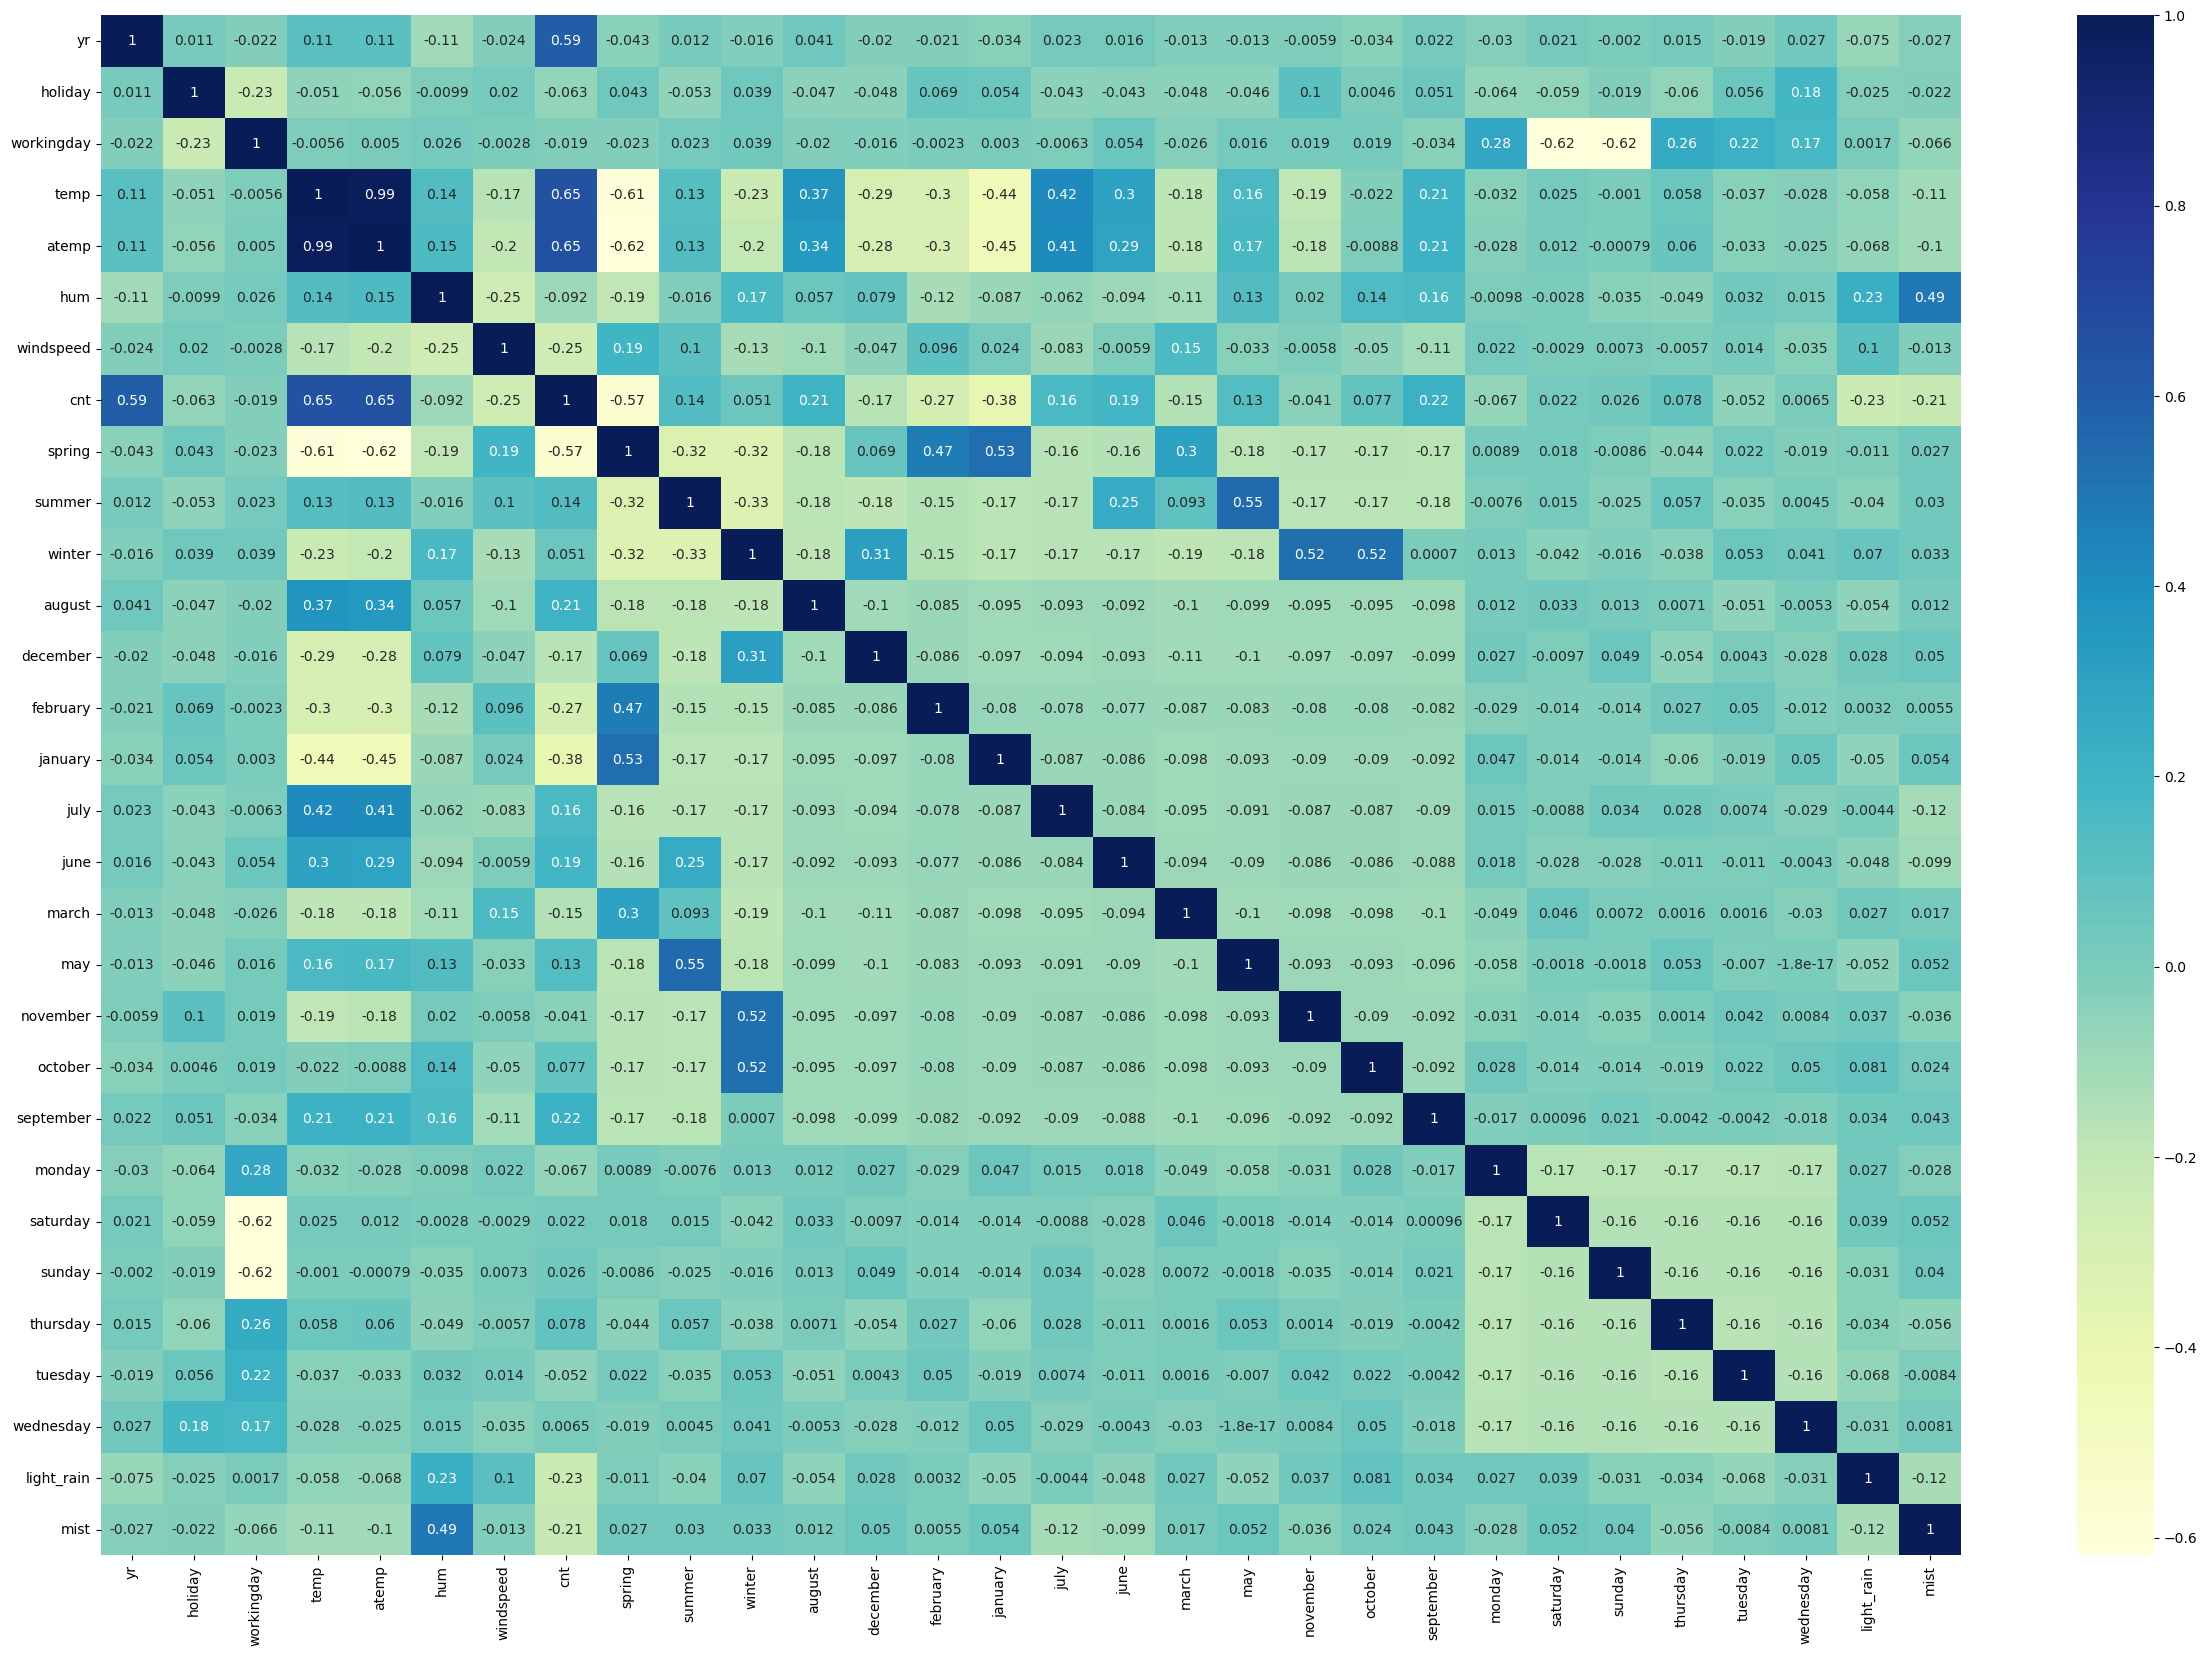

In [36]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observation
- Target variable `cnt` seems to be correlated positive with some of the features such as - `yr`, `temp`, `spring`, `windspeed` `weather condition` etc

## Step 8: Building the Linear Regression Model

#### Divinding the data in X and Y. Y is the target variable `cnt` and X being the independent variable

In [37]:
# Dividing the training dataset into X and Y 
y_train = df_train.pop("cnt")
X_train = df_train

### Model 1 : Using all the independent features

In [38]:
# checking all the columns of X_train
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'august', 'december', 'february',
       'january', 'july', 'june', 'march', 'may', 'november', 'october',
       'september', 'monday', 'saturday', 'sunday', 'thursday', 'tuesday',
       'wednesday', 'light_rain', 'mist'],
      dtype='object')

In [39]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_1 = sm.OLS(y_train, X_train_lm).fit()

In [40]:
# Check the parameters obtained
mlr_1.params

const         0.226289
yr            0.240300
holiday       0.005176
workingday    0.083231
temp          0.417156
atemp         0.050025
hum          -0.187440
windspeed    -0.167008
spring       -0.065952
summer        0.036196
winter        0.105699
august        0.024904
december     -0.040030
february     -0.029194
january      -0.046990
july         -0.038643
june          0.011192
march         0.009034
may           0.039357
november     -0.044030
october       0.020224
september     0.094361
monday       -0.023882
saturday      0.087738
sunday        0.092713
thursday      0.004404
tuesday      -0.023248
wednesday    -0.006084
light_rain   -0.234343
mist         -0.064658
dtype: float64

In [41]:
# Print a summary of the linear regression model obtained
print(mlr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          8.01e-185
Time:                        12:41:22   Log-Likelihood:                 511.61
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     480   BIC:                            -836.2
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2263      0.109      2.072      0.0

#### Checking Variation Inflation Factor (VIF) for the variables

Recommanded value of VIF is less than 5

In [42]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,449.56
4,atemp,386.94
2,workingday,73.67
5,hum,41.82
22,saturday,14.26
23,sunday,13.52
7,spring,12.73
9,winter,11.01
8,summer,9.78
10,august,6.73


#### Observation
- `temp` and `atemp` is having very high VIF value. This caused due to very high correlation between these two features.
- It is better to drop `atemp`.

### Model 2:
Dropping the variable `atemp` due to its very high `VIF value`

In [43]:
# Drop the column 'atemp' from the dataframe 'X_train'
X_train.drop(['atemp'], axis = 1, inplace = True)

In [44]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_2 = sm.OLS(y_train, X_train_lm).fit()

# Print a summary of the linear regression model obtained
print(mlr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     105.8
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          8.20e-186
Time:                        12:41:41   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -965.1
Df Residuals:                     481   BIC:                            -842.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2268      0.109      2.079      0.0

In [45]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,73.65
3,temp,44.50
4,hum,41.80
21,saturday,14.26
22,sunday,13.52
6,spring,12.71
8,winter,10.99
7,summer,9.75
17,november,6.71
9,august,6.60


### Features selection using RFE

In [46]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 20)             
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 9),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('august', False, 3),
 ('december', True, 1),
 ('february', True, 1),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 5),
 ('march', False, 6),
 ('may', True, 1),
 ('november', True, 1),
 ('october', False, 4),
 ('september', True, 1),
 ('monday', True, 1),
 ('saturday', True, 1),
 ('sunday', True, 1),
 ('thursday', False, 8),
 ('tuesday', False, 2),
 ('wednesday', False, 7),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [48]:
# selecting columns as per RFE
selected_cols = X_train.columns[rfe.support_]
selected_cols

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'december', 'february', 'january', 'july', 'may', 'november',
       'september', 'monday', 'saturday', 'sunday', 'light_rain', 'mist'],
      dtype='object')

In [49]:
# Selecting these feature variables for further model creation and evaluation
X_train_rfe = X_train[selected_cols]

In [50]:
# Head
X_train_rfe.head()

,yr,workingday,temp,hum,windspeed,spring,summer,winter,december,february,january,july,may,november,september,monday,saturday,sunday,light_rain,mist
626,1,1,0.614763,0.553027,0.371638,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
363,0,0,0.314673,0.656076,0.197852,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
425,1,0,0.366591,0.677114,0.220569,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
728,1,1,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1


### Model 3: Using all the features(selected using RFE)

In [51]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_3 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     149.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          2.40e-193
Time:                        12:42:23   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -976.6
Df Residuals:                     489   BIC:                            -887.7
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2367      0.049      4.810      0.0

In [52]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,34.51
2,temp,23.54
1,workingday,23.45
5,spring,6.18
16,saturday,5.23
17,sunday,5.06
4,windspeed,4.95
7,winter,4.22
6,summer,3.77
19,mist,2.41


### Model 4:
Dropping the variable `hum` due to its very high `VIF value`

In [53]:
# Drop the column 'hum' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["hum"], axis = 1, inplace = True)

In [54]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_4 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.7
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.80e-189
Time:                        12:42:36   Log-Likelihood:                 497.29
No. Observations:                 510   AIC:                            -954.6
Df Residuals:                     490   BIC:                            -869.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1403      0.046      3.048      0.0

In [55]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,21.18
2,temp,15.89
4,spring,5.67
15,saturday,4.89
3,windspeed,4.81
16,sunday,4.68
6,winter,3.68
5,summer,3.54
9,january,2.23
0,yr,2.09


### Model 5:
Dropping the variable `workingday` due to its very high `VIF value`

In [56]:
# Drop the column 'workingday' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["workingday"], axis = 1, inplace = True)

In [57]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_5 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     154.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          8.93e-189
Time:                        12:42:45   Log-Likelihood:                 492.96
No. Observations:                 510   AIC:                            -947.9
Df Residuals:                     491   BIC:                            -867.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2297      0.034      6.670      0.0

In [58]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.69
2,windspeed,4.65
3,spring,4.35
5,winter,2.88
4,summer,2.81
8,january,2.12
0,yr,2.09
7,february,1.87
11,november,1.75
10,may,1.63


### Model 6:
Dropping the variable `summer` due to its very high `p-value`

In [59]:
# Drop the column 'summer' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["summer"], axis = 1, inplace = True)

In [60]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_6 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     163.2
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.22e-189
Time:                        12:43:01   Log-Likelihood:                 492.36
No. Observations:                 510   AIC:                            -948.7
Df Residuals:                     492   BIC:                            -872.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2528      0.027      9.390      0.0

In [61]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.47
2,windspeed,4.06
3,spring,3.85
4,winter,2.59
7,january,2.12
0,yr,2.07
6,february,1.87
10,november,1.75
5,december,1.62
16,mist,1.56


### Model 7:
Dropping the variable `monday` due to its very high `p-value`

In [62]:
# Drop the column 'monday' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["monday"], axis = 1, inplace = True)

In [63]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_7 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.1
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.84e-190
Time:                        12:43:29   Log-Likelihood:                 491.63
No. Observations:                 510   AIC:                            -949.3
Df Residuals:                     493   BIC:                            -877.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2489      0.027      9.311      0.0

In [64]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.33
2,windspeed,4.04
3,spring,3.84
4,winter,2.58
7,january,2.11
0,yr,2.07
6,february,1.87
10,november,1.75
5,december,1.62
15,mist,1.56


### Model 8:
Dropping the variable `saturday` due to its very high `p-value`

In [65]:
# Drop the column 'saturday' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["saturday"], axis = 1, inplace = True)

In [66]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_8 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          4.92e-191
Time:                        12:43:39   Log-Likelihood:                 490.27
No. Observations:                 510   AIC:                            -948.5
Df Residuals:                     494   BIC:                            -880.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2511      0.027      9.390      0.0

In [67]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.22
2,windspeed,4.04
3,spring,3.82
4,winter,2.58
7,january,2.11
0,yr,2.07
6,february,1.87
10,november,1.75
5,december,1.62
14,mist,1.55


### Model 9:
Dropping the variable `sunday` due to its high `p-value`

In [68]:
# Drop the column 'sunday' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["sunday"], axis = 1, inplace = True)

In [69]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_9 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.0
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.60e-191
Time:                        12:43:46   Log-Likelihood:                 488.68
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     495   BIC:                            -883.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2549      0.027      9.545      0.0

In [70]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.19
2,windspeed,4.02
3,spring,3.82
4,winter,2.58
7,january,2.11
0,yr,2.07
6,february,1.87
10,november,1.75
5,december,1.61
13,mist,1.54


### Model 10:
Dropping the variable `may` due to its high `p-value`

In [71]:
# Drop the column 'may' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["may"], axis = 1, inplace = True)

In [72]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_10 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          9.46e-192
Time:                        12:43:58   Log-Likelihood:                 486.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     496   BIC:                            -885.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2635      0.026      9.953      0.0

In [73]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.76
2,windspeed,4.02
3,spring,3.75
4,winter,2.50
7,january,2.10
0,yr,2.07
6,february,1.87
9,november,1.75
5,december,1.61
12,mist,1.53


### Model 11:
Dropping the variable `february` due to its high `p-value`

In [74]:
# Drop the column 'february' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["february"], axis = 1, inplace = True)

In [75]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_11 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     224.5
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          7.52e-192
Time:                        12:44:10   Log-Likelihood:                 483.86
No. Observations:                 510   AIC:                            -941.7
Df Residuals:                     497   BIC:                            -886.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2508      0.026      9.658      0.0

In [76]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.74
2,windspeed,4.02
4,winter,2.45
3,spring,2.32
0,yr,2.07
8,november,1.73
6,january,1.60
11,mist,1.53
5,december,1.49
7,july,1.37


### Model 12:
Dropping the variable `january` due to its high `p-value`

In [77]:
# Drop the column 'january' from the dataframe 'X_train_rfe'
X_train_rfe.drop(["january"], axis = 1, inplace = True)

In [78]:
# Add a constant using statsmodels
X_train_lm = sm.add_constant(X_train_rfe)

# Fit a ordinary least squares (OLS) regrassion model using statsmodels
mlr_12 = sm.OLS(y_train, X_train_lm).fit()

# # Print a summary of the linear regression model obtained
print(mlr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     241.6
Date:                Tue, 02 Apr 2024   Prob (F-statistic):          1.28e-191
Time:                        12:44:22   Log-Likelihood:                 480.46
No. Observations:                 510   AIC:                            -936.9
Df Residuals:                     498   BIC:                            -886.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2316      0.025      9.255      0.0

In [79]:
# Check for the VIF(Variation Inflation Factor) of the feature variables
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.71
2,windspeed,4.02
4,winter,2.42
0,yr,2.06
7,november,1.72
3,spring,1.69
10,mist,1.52
5,december,1.44
6,july,1.37
8,september,1.23


#### Observation
- In model 12 we can see that VIF of all the features in considerable range (<5)
- All p-value are also in the acceptable range
- All features are significant
- We will perform residual analysis and evaluation with this model 12

## Step 9: Residual Analysis of the Train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [80]:
# Add a constant using statsmodels
X_train_sm = sm.add_constant(X_train_rfe)

In [81]:
# predict the target variable using the final model mlr_12 and dataframe X_train_sm
y_train_pred = mlr_12.predict(X_train_sm)

In [82]:
# Calculating the residuals
res = (y_train - y_train_pred)

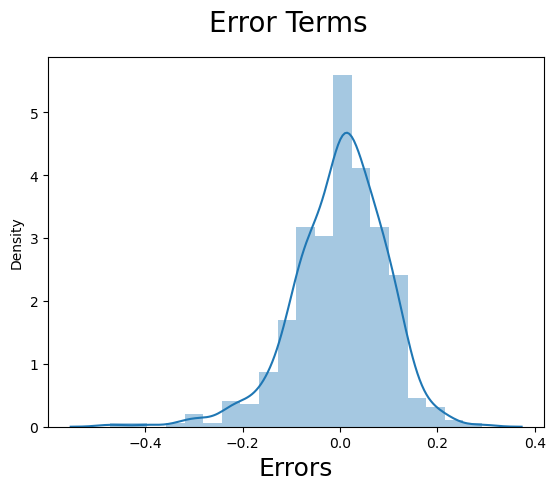

In [83]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

The residuals are following the normal distribution with a mean 0. All good!

#### Let's check for patterns in the residuals

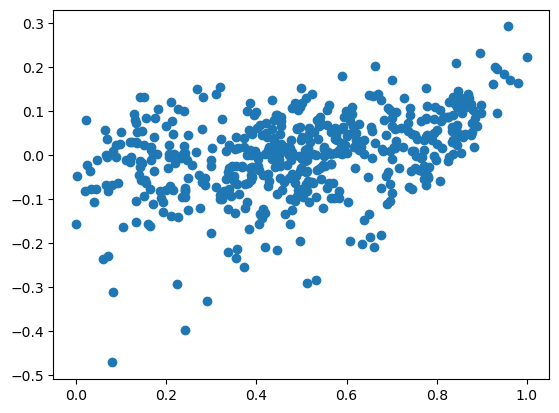

In [84]:
plt.scatter(y_train,res)
plt.show()

No such patterns observed, thus homoscedacity assumption is satisfied

## Step 10: Making Prediction Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model, i.e. model 12 (mlr_12)

#### Applying the scaling on the Test dataset

In [85]:
# Let's check the head of test dataset first
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_rain,mist
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
639,1,0,1,24.224153,27.11665,87.1667,6.999825,4639,0,0,...,1,0,0,0,0,0,0,1,1,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [86]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# Here we'll use only 'transform', instead of fit_transform for scaling the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [87]:
# check the head of data after rescaling
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_rain,mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.677532,0,0,...,0,0,0,0,0,0,0,1,0,1
639,1,0,1,0.662528,0.608096,0.898240,0.133655,0.508028,0,0,...,1,0,0,0,0,0,0,1,1,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.268985,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.525051,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.547748,0,1,...,0,0,0,1,0,0,0,0,0,0


In [88]:
# Check the stats of the test dataset
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_rain,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.045662,0.648402,0.554935,0.529249,0.642466,0.326821,0.487825,0.255708,0.269406,...,0.091324,0.073059,0.114155,0.159817,0.155251,0.146119,0.150685,0.164384,0.031963,0.319635
std,0.500513,0.209229,0.478563,0.230772,0.215679,0.148689,0.158694,0.223736,0.437258,0.444668,...,0.288730,0.260830,0.318728,0.367276,0.362974,0.354034,0.358561,0.371472,0.176306,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.298841,-0.042808,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353611,0.344751,0.531773,0.212553,0.338585,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547268,0.538428,0.636324,0.311480,0.501630,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750790,0.709166,0.741240,0.415786,0.628335,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.815502,0.941205,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [89]:
# Diving in X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [90]:
# Adding constant variable to test dataframe
X_test_mlr_12 = sm.add_constant(X_test)

In [91]:
# Creating X_test_mlr_12 dataframe by selecting the required variables from X_test_mlr_12

X_test_mlr_12 = X_test_mlr_12[['yr', 'temp', 'windspeed', 'spring', 'winter', 'december', 'july', 'november', 'september', 'light_rain', 'mist']]

In [92]:
# check the head 
X_test_mlr_12.head()

,yr,temp,windspeed,spring,winter,december,july,november,september,light_rain,mist
184,0,0.831783,0.084219,0,0,0,1,0,0,0,1
639,1,0.662528,0.133655,0,1,0,0,0,0,1,0
299,0,0.511964,0.334206,0,1,0,0,0,0,0,1
221,0,0.881625,0.339570,0,0,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0,0,0


In [93]:
# Adding constant variable to test dataframe
X_test_mlr_12 = sm.add_constant(X_test_mlr_12)

In [94]:
# Making predictions using the final model mlr_12

y_test_pred_mlr_12 = mlr_12.predict(X_test_mlr_12)

## Step 11: Model Evaluation

Now since we are ready with the final model (mlr_12) prediction on the Test dataset. Let's now plot the graph for actual versus predicted values.

#### Actual vs Predicted values using scatter plot

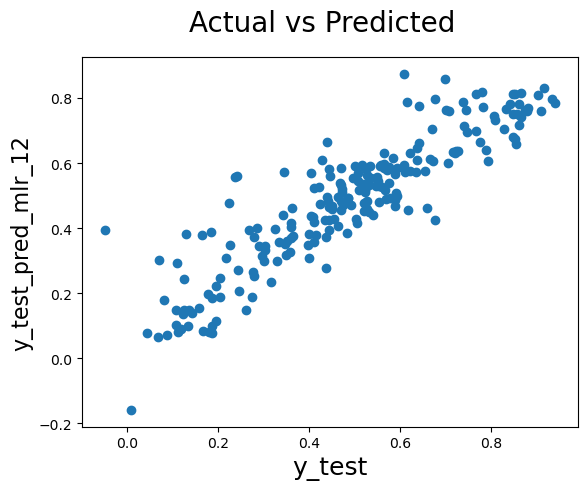

In [95]:
# Plotting y_test and y_pred_mlr_12 to understand the spread using scatter plot

fig = plt.figure()
plt.scatter(y_test, y_test_pred_mlr_12)
fig.suptitle('Actual vs Predicted', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                             
plt.ylabel('y_test_pred_mlr_12', fontsize = 16) 

plt.show()

#### Actual vs Predicted values variation

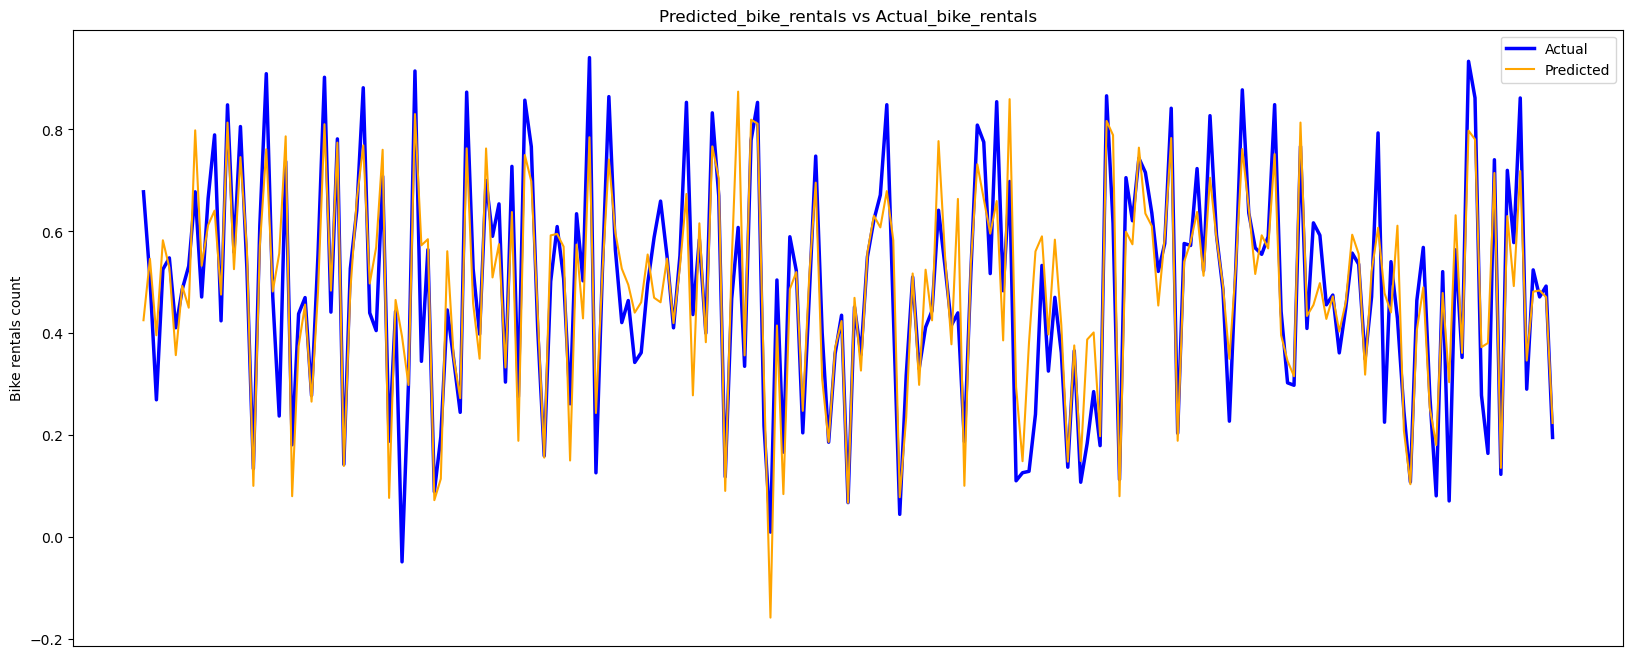

In [96]:
# Actual vs Predicted
fig, ax = plt.subplots(figsize=(20, 8))

l1, = ax.plot(range(len(y_test)), y_test, label='Actual', color='blue', linewidth=2.5)
l2, = ax.plot(range(len(y_test_pred_mlr_12)), y_test_pred_mlr_12, label='Predicted', color='orange', linewidth=1.5)
ax.legend(handles=[l1, l2])
ax.set_title('Predicted_bike_rentals vs Actual_bike_rentals')
ax.set_ylabel('Bike rentals count')
ax.set_xticks([]) 

plt.show()

Actual and predicted values seems to be very close. Model is a good fit.

#### Checking the error terms

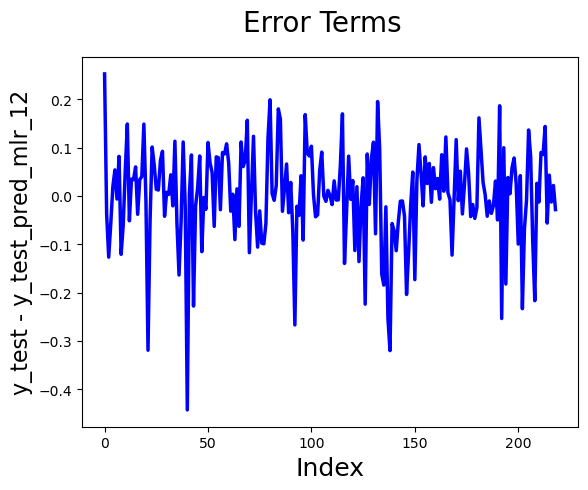

In [97]:
# Error terms

fig = plt.figure()

plt.plot(range(len(y_test)), y_test - y_test_pred_mlr_12, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                     
plt.ylabel('y_test - y_test_pred_mlr_12', fontsize=16)  

plt.show()

No any pattern observed for the error terms. Thus satisfying the assumption

#### Visualising the fit on the Test data using Regplot

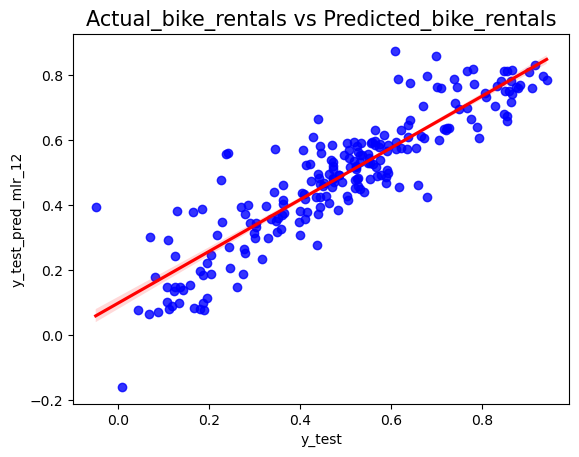

In [98]:
# plotting a regplot
plt.figure()

sns.regplot(x= y_test, y= y_test_pred_mlr_12, ci= 68, fit_reg= True, scatter_kws= {"color":"blue"}, line_kws={"color":"red"})
plt.title('Actual_bike_rentals vs Predicted_bike_rentals', fontsize= 15)
plt.xlabel('y_test', fontsize= 10)
plt.ylabel('y_test_pred_mlr_12', fontsize= 10)

plt.show()

#### Observation
- Our regression line seems to be a good fit
- Let's check the R-squared value for the Test data

#### Comparing the R-squared value for Train and Test dataset

In [99]:
# Checking the R-squared value for the Train set
r_squared_train = r2_score(y_train, y_train_pred)
print('R-squared value for the Train dataset', r_squared_train)


# Checking the R-squared value for the Test set
r_squared_test = r2_score(y_test, y_test_pred_mlr_12)
print('R-squared value for the Test dataset', r_squared_test)


R-squared value for the Train dataset 0.8421579512778632
R-squared value for the Test dataset 0.8005342146374481


#### Observation
- we can see that the R-squared value for the Test datset is 0.80 which is very good. Thus, our final regression model is a good fit model

In [100]:
# Checking the mean_squared_error value for the Train set
mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
print('Mean_squared_error for the Train dataset', mse_train)


# Checking the mean_squared_error value for the Test set
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_mlr_12))
print('Mean_squared_error for the Test dataset', mse_test)


Mean_squared_error for the Train dataset 0.09432446628673125
Mean_squared_error for the Test dataset 0.09969578614927853


## Step 12: Summary and Conclusion

We found that our final linear regression model (mlr_12) is a good fit for the Train as well as Test dataset
- R_squared value for the Test dataset is found to be equal to 0.80
- Model is a good fit

#### 1. Equation of the multiple linear regression line is given as :

$ cnt = 0.2316 + 0.2451 \times yr + 0.4462 \times temp - 0.1257 \times windspeed - 0.1306 \times spring + 0.0702 \times winter - 0.0450 \times december - 0.0744 \times july - 0.0609 \times november + 0.0509 \times september - 0.2800 \times lightrain - 0.0926 \times mist $

#### 2. Computing R-Squared value for the Test dataset based on our final model (mlr_12)

In [101]:
# Checking the R-squared value for the Test set

r_squared_test = r2_score(y_test, y_test_pred_mlr_12)

# Printing the R-squared value for the Test set
print('R-squared value for the Test dataset', r_squared_test)

R-squared value for the Test dataset 0.8005342146374481


#### 3. Which variables are significant in predicting the demand for shared bikes?

Following are the top 5 variables those are significant in predicting the demand for shared bikes:

1. Temperature `temp` : With a coefficient of $+ 0.4462$
2. Weather situation #3  : `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds` : With a coefficient of $- 0.2800$
3. Year `yr` : With a coefficient of $+ 0.2451$
4. Season `spring` and `winter` : With a coefficient of $- 0.1306$ and $+ 0.0702$ respectively
5. Month `september` : With a coefficient of $+ 0.0509$

#### 4. How well those variables describe the bike demands?

Following describes each variables, how it describes the bike rental demands :

1. Temperature `temp` : With a coefficient of $+ 0.4462$. Meaning with unit increase in temperature, the bike rental counts increases by a factor of $0.4462$.
2. Weather situation #3  : `Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds` : With a coefficient of $- 0.2800$. Meaning, if a particular day is having such weather conditions, the bike rental demands tends to decrease by a factor of $0.28$.
3. Year `yr` : With a coefficient of $+ 0.2451$. Meaning, if all the other factors remains unchanged, the company tends to expect a yearly growth in bike rental demand by a factor of $0.2415$.
4. Season `spring` and `winter` : With a coefficient of $- 0.1306$ and $+ 0.0702$ respectively. Meaning, during spring company can expect the bike rental demands to decrease by a factor of  $0.1306$ and during winter company can expect the bike rental demands to increase by a factor of  $0.0702$.
5. Month `september` : With a coefficient of $+ 0.0509$. Meaning, during the month of september company can expect the bike rental demands to increase by a factor of  $0.0509$. 

#### 5. Recommandations to `Boombikes` team 

Following are the recommandations to the Boombikes management team so as to accelerate their business and to meet the demand levels and meet the customer's expectations.

- With unit increase in temperature, the bike rental counts increases by a factor of 0.4462. Thus, they should promote for more advertisement and the necessary capacity buliding during the hotter months of the Year so as to fulfill the requirement of the customers and boost the business.
<br>
- If a particular day is having such weather conditions like (light rain & thunderstorm), the bike rental demands tends to decrease by a factor of 0.28. Thus, the company should promote for more rainy season fun-activity advertisment and also some discounts offers so as to attract more customers.
<br>
- If all the other factors remains unchanged, the company tends to expect a yearly growth in bike rental demand by a factor of 0.2415. Thus, company should plan for its annual cost, revenue, investments and others accordingly to compete the competitors.
<br>
- Monthly trends shows the bike rentals tends to be more in the months between july to october as compared to other months. Thus, the company should accordingly promote for some innovative monthwise activity based social advertisments so as to attract more customers. 
<br>
- During bike rental demands decreases by a factor of  0.1306 and during winter it increases by a factor of  0.0702. Thus, the company should accordingly promote for some innovative sessional based social advertisments and offers so as to attract more customers. 
